In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


# Data Extraction

In [2]:
df = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Exploratory Data Analysis (EDA)

In [3]:
#check the shape of dataset
df.shape

(768, 9)

In [4]:
#check all columns
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
# Let’s also make sure that our data is clean (has no null values, etc)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Note that the data does have some missing values (see Insulin = 0) in the samples in the previous 
figure. Ideally we could replace these 0 values with the mean value for that feature, but we’ll skip 
that for now.

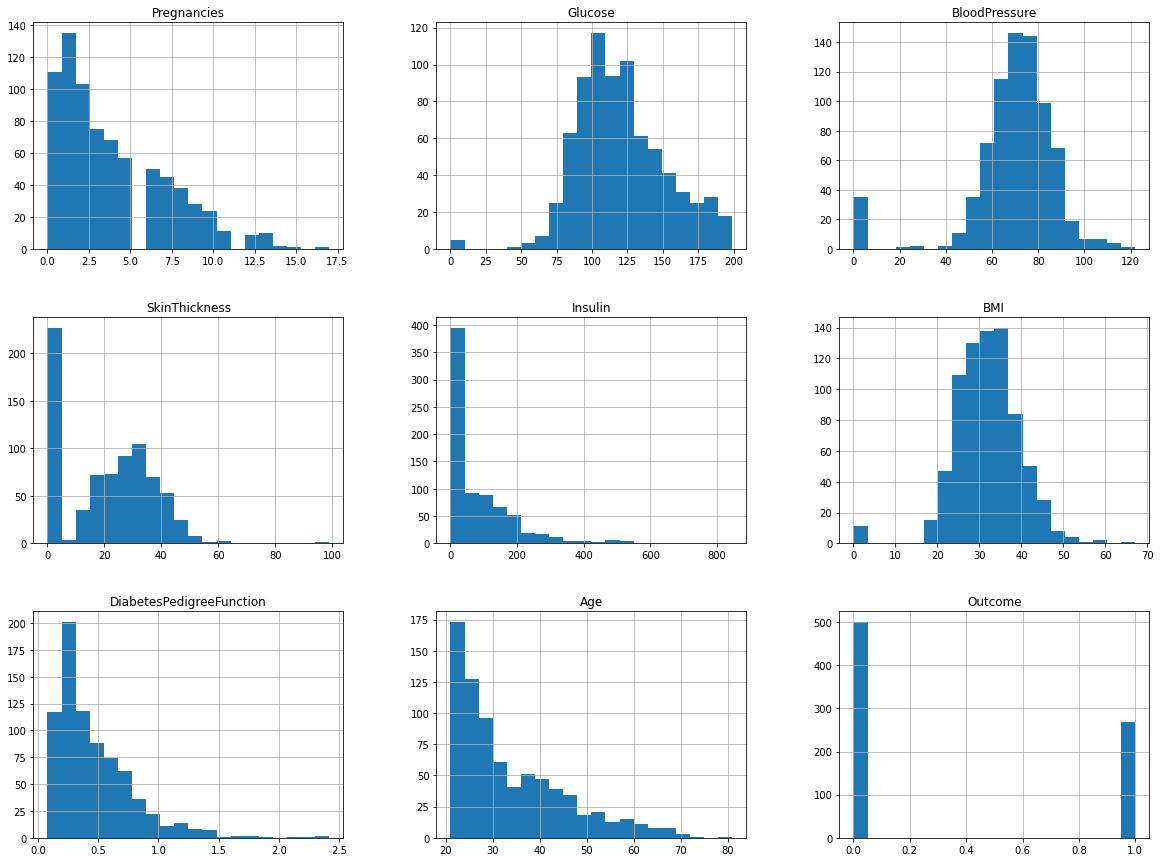

In [6]:
#plotar o histograma das variaveis numéricas
df.hist(bins=20, figsize=(20,15));

In [7]:
df.drop_duplicates()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
#describe all columns
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Figure size 720x576 with 0 Axes>

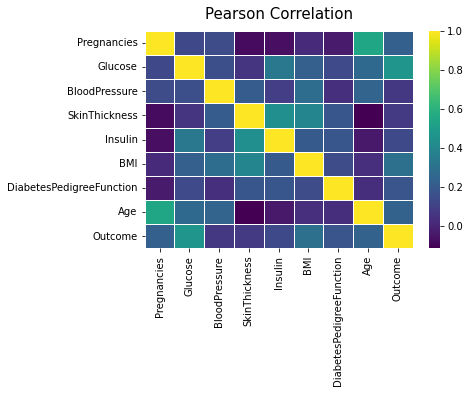

<Figure size 720x576 with 0 Axes>

In [10]:
#visualize correlation of each variable using pearson correlation
sns.heatmap(df.corr(), vmax = 1, linewidths = 0.9, cmap = 'viridis')
plt.title('Pearson Correlation', fontsize = 15, pad = 12)
plt.figure(figsize = (10,8))

In the above heatmap, brighter colors indicate more correlation. As we can see from the table and the heatmap, glucose levels, age, BMI and number of pregnancies all have significant correlation with the outcome variable. Also notice the correlation between pairs of features, like age and pregnancies, or insulin and skin thickness.

# Machine Learning - Predizer a ocorrência de diabetes - Utilizando Extra Tree Classifier

In [11]:
preditora = df.drop('Outcome',axis=1)
alvo      = df['Outcome']

In [12]:
x_treino,x_test,y_treino,y_test = train_test_split(preditora, alvo, test_size = 0.3)

In [13]:
# ExtraTreesClassifier
'''An extra-trees classifier.

This class implements a meta estimator that fits a number of randomized decision trees 
(a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the 
predictive accuracy and control over-fitting.
'''

modelo = ExtraTreesClassifier()
modelo.fit(x_treino,y_treino)

resultado = modelo.score(x_test,y_test)
print('Accuracy = ',resultado*100,'%')

Accuracy =  74.45887445887446 %


# Machine Learning - Predizer a ocorrência de diabetes - Utilizando Logistic Regression

In [14]:
dfTrain = df[:650]
dfTest = df[650:]

In [15]:
trainLabel = dfTrain['Outcome']
trainData = dfTrain.drop('Outcome',axis=1)
testLabel = dfTest['Outcome']
testData = dfTest.drop('Outcome',axis=1)

In [16]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

# np.mean(trainData, axis=0) => check that new means equal 0
# np.std(trainData, axis=0) => check that new stds equal 1

In [17]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [18]:
accuracy = diabetesCheck.score(testData, testLabel)
print("Accuracy = ", accuracy * 100, "%")

Accuracy =  78.8135593220339 %


Text(0.5, 0, 'Importance')

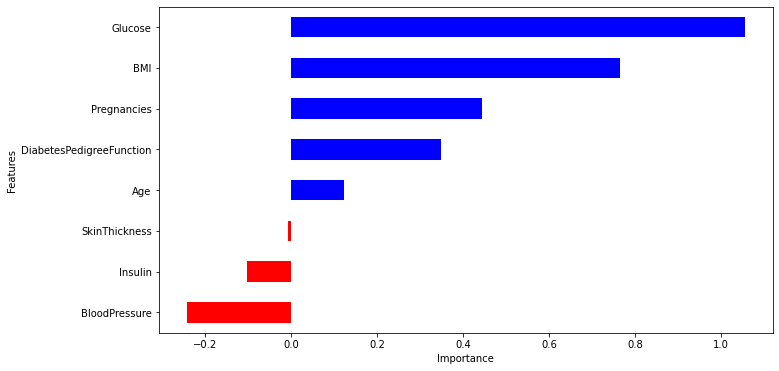

In [19]:
coeff = list(diabetesCheck.coef_[0])
labels = list(trainData.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

From the above figure, we can draw the following conclusions.
Glucose level, BMI, pregnancies and diabetes pedigree function have significant influence on the model, specially glucose level and BMI. It is good to see our machine learning model match what we have been hearing from doctors our entire lives!
Blood pressure has a negative influence on the prediction, i.e. higher blood pressure is correlated with a person not being diabetic. (also, note that blood pressure is more important as a feature than age, because the magnitude is higher for blood pressure).
Although age was more correlated than BMI to the output variables (as we saw during data exploration), the model relies more on BMI. This can happen for several reasons, including the fact that the correlation captured by age is also captured by some other variable, whereas the information captured by BMI is not captured by other variables.
Note that this above interpretations require that our input data is normalized. Without that, we can’t claim that importance is proportional to weights.


# Conclusions

O extra-trees classifier e a logistic regression se mostraram acurados para este caso;

A relação entre gravidez e idade não obedece uma relação linear de acordo com a análise de regressão linear feita, dessa forma, já era de se esperar que o coeficiente de determinação (r2_score) fosse próximo a zero.